We are now ready for creating more complex models. We next summarize three architectures that we will need and how to use them in Tensorflow

# RNN

When you have the time, go over [this excellent post](https://r2rt.com/recurrent-neural-networks-in-tensorflow-i.html).

You can read [here] about them. Let's create a simple one for deducing the next digit in the sequence 0,0,1,0,0,1,0,0,1,0,0,1,...

In [1]:
import tensorflow as tf
import numpy as np

In Tensorflow RNN are created in two steps:

1. Decide on the type of cell the RNN will have (basic, LSTM, GRU, etc.)

2. Decide how to unroll the RNN: Since there are two possible ways of unrolling:
    - Static ones: Which will unroll depending on the batch size.
    - Dynamic ones: Which will just take any input.

There's a discussion out there about which one is better, but it seems that dynamic ones are faster.

## Static ones and most basic RNN

### Preparations

Let's first create our data:

In [2]:
X_data = [[[0],[0],[1],[0]],[[0],[1],[0],[0]],[[1],[0],[0],[1]]]
y_data= [[[0],[1],[0],[0]],[[1],[0],[0],[1]],[[0],[0],[1],[0]]]
X_data=np.array(X_data)
y_data=np.array(y_data)

and some placeholders for it

In [3]:
X = tf.placeholder(shape=(3,4,1),dtype=tf.float32)
y = tf.placeholder(shape=(3,4,1),dtype=tf.float32)

#We will talk about the following line in a bit
init_state = tf.zeros([4,1])

We use  tf.nn.rnn_cell.BasicRNNCell() as our most basic RNN cell, this follows the formula

$$ \text{output = new_state = activation(W * input + U * state + B).} $$

The signature of the basic cell, when creating, is

tf.contrib.rnn.BasicRNNCell.\__init\__(num_units,input_size=None,activation=tanh)

So let's crete a simple cell and let's have just one unit so we don't have to process the output further (this is also the state size).

In [4]:
cell = tf.contrib.rnn.BasicRNNCell(1)

and we create the rnn layer now

In [5]:
X2=tf.unstack(X,axis=0)
output,state= tf.contrib.rnn.static_rnn(cell,X2,dtype=tf.float32,initial_state=init_state )

We now should train this, we first compute the loss

In [6]:
loss = tf.reduce_sum(tf.square(output[0]-y[0]))+tf.reduce_sum(tf.square(output[1]-y[1]))+tf.reduce_sum(tf.square(output[2]-y[2]))

and use our favorite gradient descent optimizer

In [7]:
optimizer = tf.train.AdamOptimizer().minimize(loss)

we are ready to run a session

In [8]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
losses=[]
for i in range(30000):
        loss_,_=sess.run([loss,optimizer],feed_dict={X:X_data,y:y_data})
        losses+=[loss_]

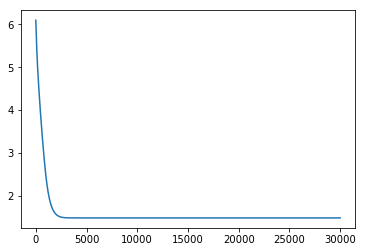

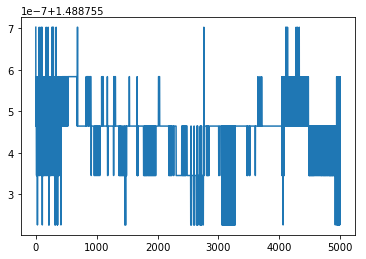

In [10]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()
plt.plot(losses[5000:10000])
plt.show()

In [11]:
sess.run(output,feed_dict={X:X_data,y:y_data})[0]

array([[ 0.45854849],
       [ 0.45854849],
       [-0.39763433],
       [ 0.45854849]], dtype=float32)

Note, that we are not really predicting enough, can you think why?

** Exercise: ** Fix it!